## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
# Read the mouse data and the study results
mouse_metadata = pd.read_csv("../Resources/Mouse_metadata.csv")
study_results = pd.read_csv("../Resources/Study_results.csv")

# Combine the data into a single dataset
merged = mouse_metadata.merge(study_results, how="right", on='Mouse ID')

# Display the data table for preview
merged.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(merged["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated = merged.loc[merged.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicated

array(['g989'], dtype=object)

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# mouse_id = merged["Mouse ID"]
# time_point = merged["Timepoint"]
# Duplicate = pd.DataFrame({"Mouse ID": mouse_id,
#                      "Timepoint": time_point})
# Duplicate.head()


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = merged.drop_duplicates(subset=None, keep='first', inplace=False)
clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
count_merged = clean['Mouse ID'].count()
count_merged

1892

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Regimen = pd.DataFrame()
means = merged.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
medians = merged.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
var = merged.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
std = merged.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
sem = merged.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

# # Assemble the resulting series into a single summary dataframe.
Regimen = pd.DataFrame({"Mean Tumor Vol": means,
                       "Median": medians,
                       "Variance": var,
                       "Std": std,
                       "Standard Error": sem})
Regimen


,Mean Tumor Vol,Median,Variance,Std,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
merged.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
merged.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    AxesSubplot(0.125,0.125;0.775x0.755)
Ceftamin     AxesSubplot(0.125,0.125;0.775x0.755)
Infubinol    AxesSubplot(0.125,0.125;0.775x0.755)
Ketapril     AxesSubplot(0.125,0.125;0.775x0.755)
Naftisol     AxesSubplot(0.125,0.125;0.775x0.755)
Placebo      AxesSubplot(0.125,0.125;0.775x0.755)
Propriva     AxesSubplot(0.125,0.125;0.775x0.755)
Ramicane     AxesSubplot(0.125,0.125;0.775x0.755)
Stelasyn     AxesSubplot(0.125,0.125;0.775x0.755)
Zoniferol    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

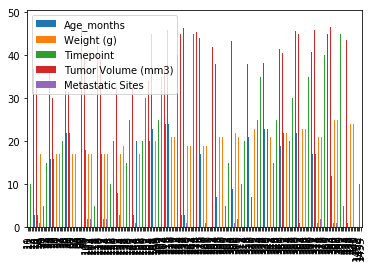

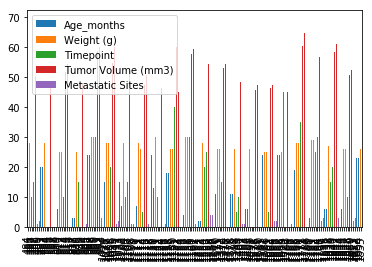

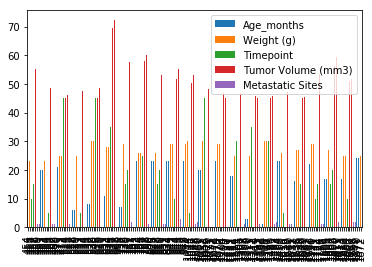

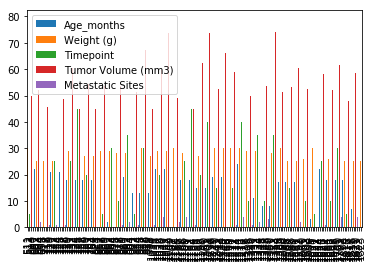

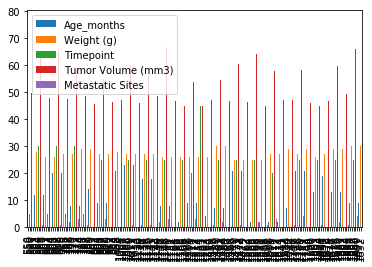

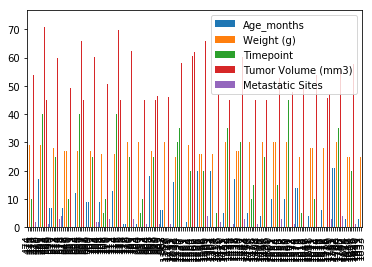

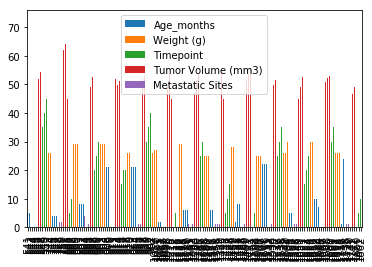

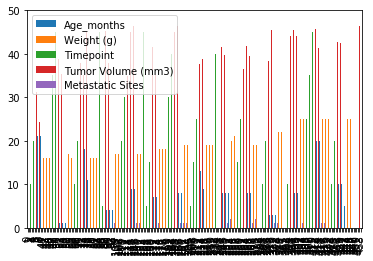

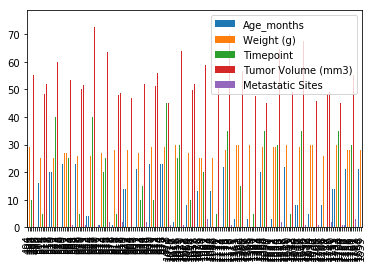

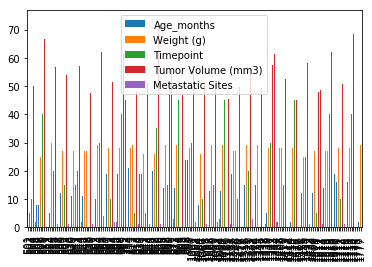

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas
RG = merged.groupby('Drug Regimen')
RG.plot(kind='bar')

TypeError: unhashable type: 'numpy.ndarray'

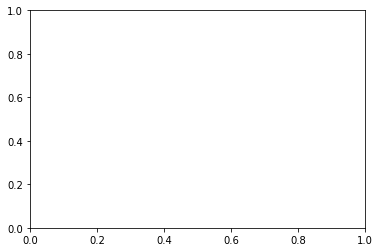

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(RG, 100)

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
